In [36]:
import numpy as np
import pandas as pd
import seaborn as sns

In [1]:
log_path = r'C:\Users\kmk280\Downloads\ProcessMonitor\Logfile.CSV'

In [3]:
df = pd.read_csv(log_path)

In [15]:
df['res'] = [int(x.split('\\')[-4]) for x in df.Path]
df['time'] = [int(x.split('\\')[-3]) for x in df.Path]
df['x'] = [int(x.split('\\')[-2]) for x in df.Path]
df['y'] = [int(x.split('\\')[-1]) for x in df.Path]

In [16]:
df


,Time of Day,Process Name,PID,Operation,Path,Result,Detail,res,time,x,y
0,3:12:48.1380041 PM,python.exe,7796,CreateFile,D:\kasia\tracking\zarr_tests\E6_C1_c1.zarr\1\0...,SUCCESS,"Desired Access: Read Attributes, Synchronize, ...",1,0,5,8
1,3:12:48.1380333 PM,python.exe,7796,QueryInformationVolume,D:\kasia\tracking\zarr_tests\E6_C1_c1.zarr\1\0...,SUCCESS,"VolumeCreationTime: 8/22/2023 12:05:33 PM, Vol...",1,0,5,8
2,3:12:48.1380531 PM,python.exe,7796,QueryAllInformationFile,D:\kasia\tracking\zarr_tests\E6_C1_c1.zarr\1\0...,BUFFER OVERFLOW,"CreationTime: 3/5/2024 4:32:20 PM, LastAccessT...",1,0,5,8
3,3:12:48.1380709 PM,python.exe,7796,CloseFile,D:\kasia\tracking\zarr_tests\E6_C1_c1.zarr\1\0...,SUCCESS,NaN,1,0,5,8
4,3:12:48.1383389 PM,python.exe,7796,CreateFile,D:\kasia\tracking\zarr_tests\E6_C1_c1.zarr\1\0...,SUCCESS,"Desired Access: Read Attributes, Synchronize, ...",1,0,4,43
...,...,...,...,...,...,...,...,...,...,...,...
248593,3:14:06.6000995 PM,python.exe,7796,CloseFile,D:\kasia\tracking\zarr_tests\E6_C1_c1.zarr\1\3...,SUCCESS,NaN,1,3,50,39
248594,3:14:06.6002116 PM,python.exe,7796,ReadFile,D:\kasia\tracking\zarr_tests\E6_C1_c1.zarr\1\3...,END OF FILE,"Offset: 839,763, Length: 1",1,3,38,65
248595,3:14:06.6009991 PM,python.exe,7796,ReadFile,D:\kasia\tracking\zarr_tests\E6_C1_c1.zarr\1\3...,END OF FILE,"Offset: 1,179,843, Length: 1",1,3,63,9
248596,3:14:06.6011074 PM,python.exe,7796,CloseFile,D:\kasia\tracking\zarr_tests\E6_C1_c1.zarr\1\3...,SUCCESS,NaN,1,3,38,65


In [17]:
df_sel = df.loc[((df['res'] == 1) & (df['time'] == 3)),['x','y']]

In [21]:
df_reset = df_sel.reset_index()
df_reset

,index,x,y
0,157122,60,4
1,157123,60,4
2,157124,60,4
3,157125,48,30
4,157126,60,4
...,...,...,...
91471,248593,50,39
91472,248594,38,65
91473,248595,63,9
91474,248596,38,65


In [42]:
np.sum(df_reset['index']>248000)

0

<Axes: xlabel='x', ylabel='y'>

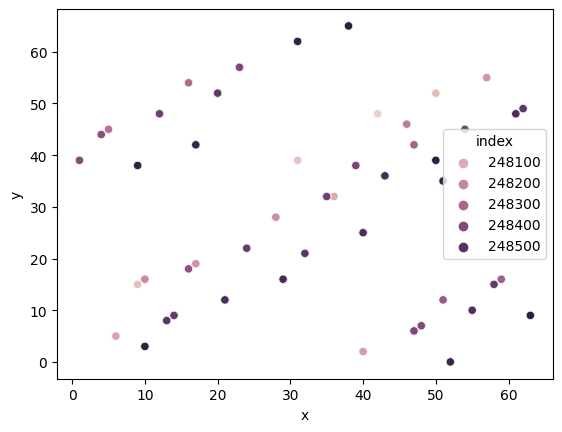

In [43]:
sns.scatterplot(data=df_reset.loc[df_reset['index']>248000], x='x', y='y',hue='index')